In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir())

['concatenated_results.csv', '1605T100817', '1313T030817', 'plot_bayesian_posterior.ipynb', '1608T100817', '.ipynb_checkpoints', 'DataMerge.ipynb', '1614T100817']


In [3]:
result = pd.DataFrame()
#pfile=os.path.join('1313T030817','parameters.csv')
pfile='concatenated_results.csv'
num_lines = sum(1 for line in open(pfile))-1
df = pd.read_csv(pfile, chunksize=10000, index_col='idx')
for chunk in df:
    #chunk.dropna(axis=0, inplace=True) # Dropping all rows with any NaN value
    chunk.fillna(100000, inplace=True)
    result = result.append(chunk)

print("Number of lines:\t{}".format(num_lines))
print("Number of NaN values:\t{}".format(num_lines-sum(pd.notnull(result['euclidean']))))

Number of lines:	299997
Number of NaN values:	0


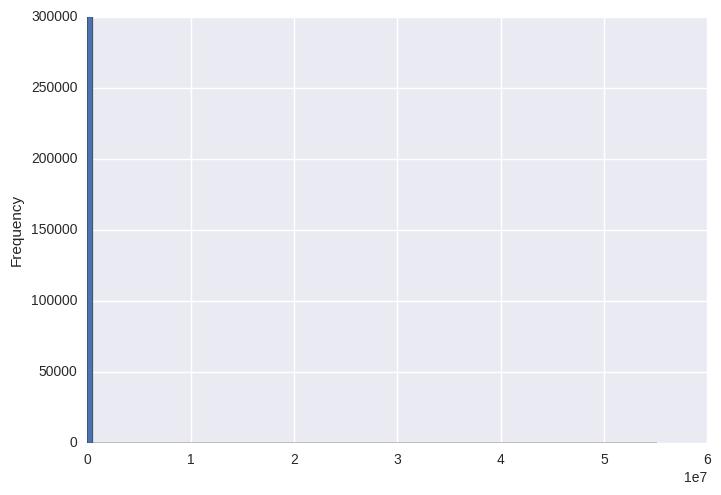

In [4]:
result['euclidean'].plot(kind='hist', bins=100)

Zoom in to lowest 1% of distances to get a better idea of how they are distributed at the bottom end.

Index(['MAE', 'MSE', 'Vol_mit', 'cytox_tot_tis', 'euclidean', 'manhattan',
       'r_0', 'r_m', 'r_t'],
      dtype='object')


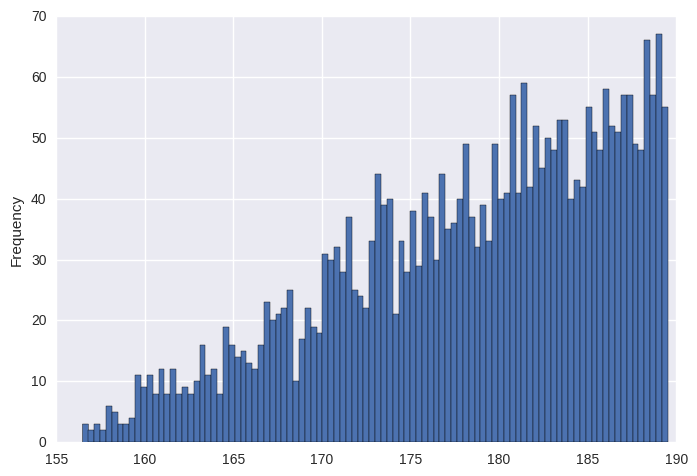

In [5]:
result.sort_values(by='euclidean', inplace=True)
print(result.columns)
result['euclidean'].iloc[:int(num_lines/100)].plot(kind='hist', bins=100)

# Obtaining posteriors #
From the current OpenOpt framework, a distance of about 165 has been obtained as a best fit. Adding a small amount on to this to allow for the fact that 165 is not a "truly" best fit - a lower value may be possible and a slightly higher value may be considered a reasonable fit overall.

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


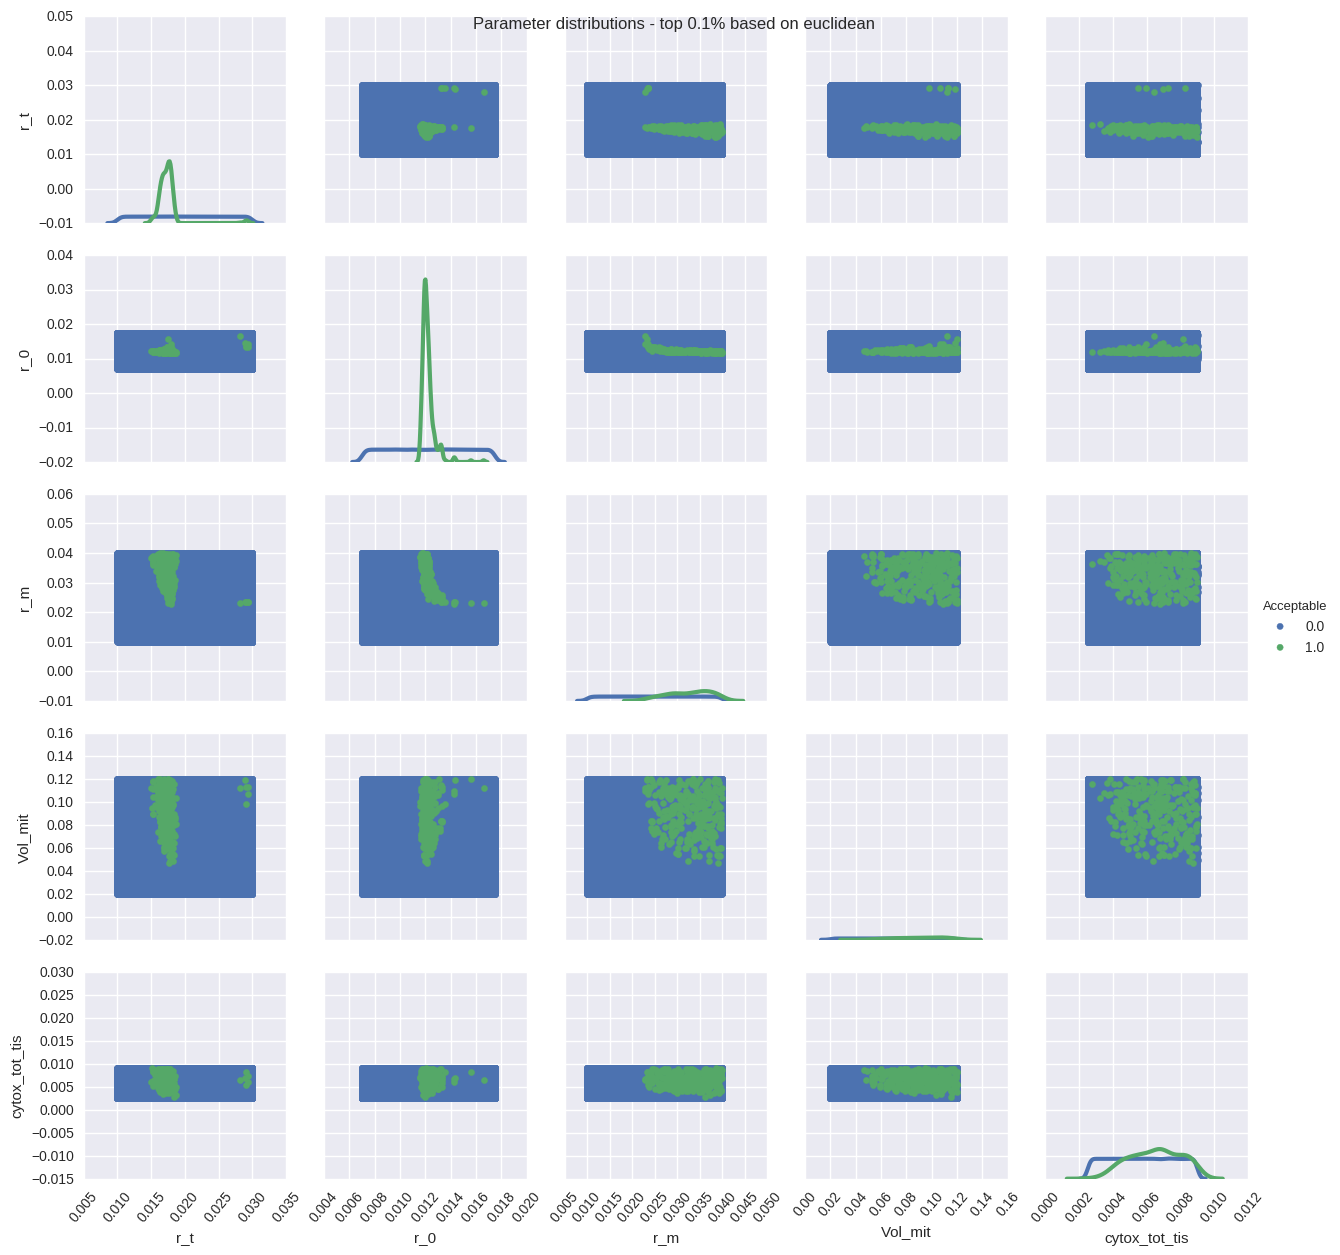

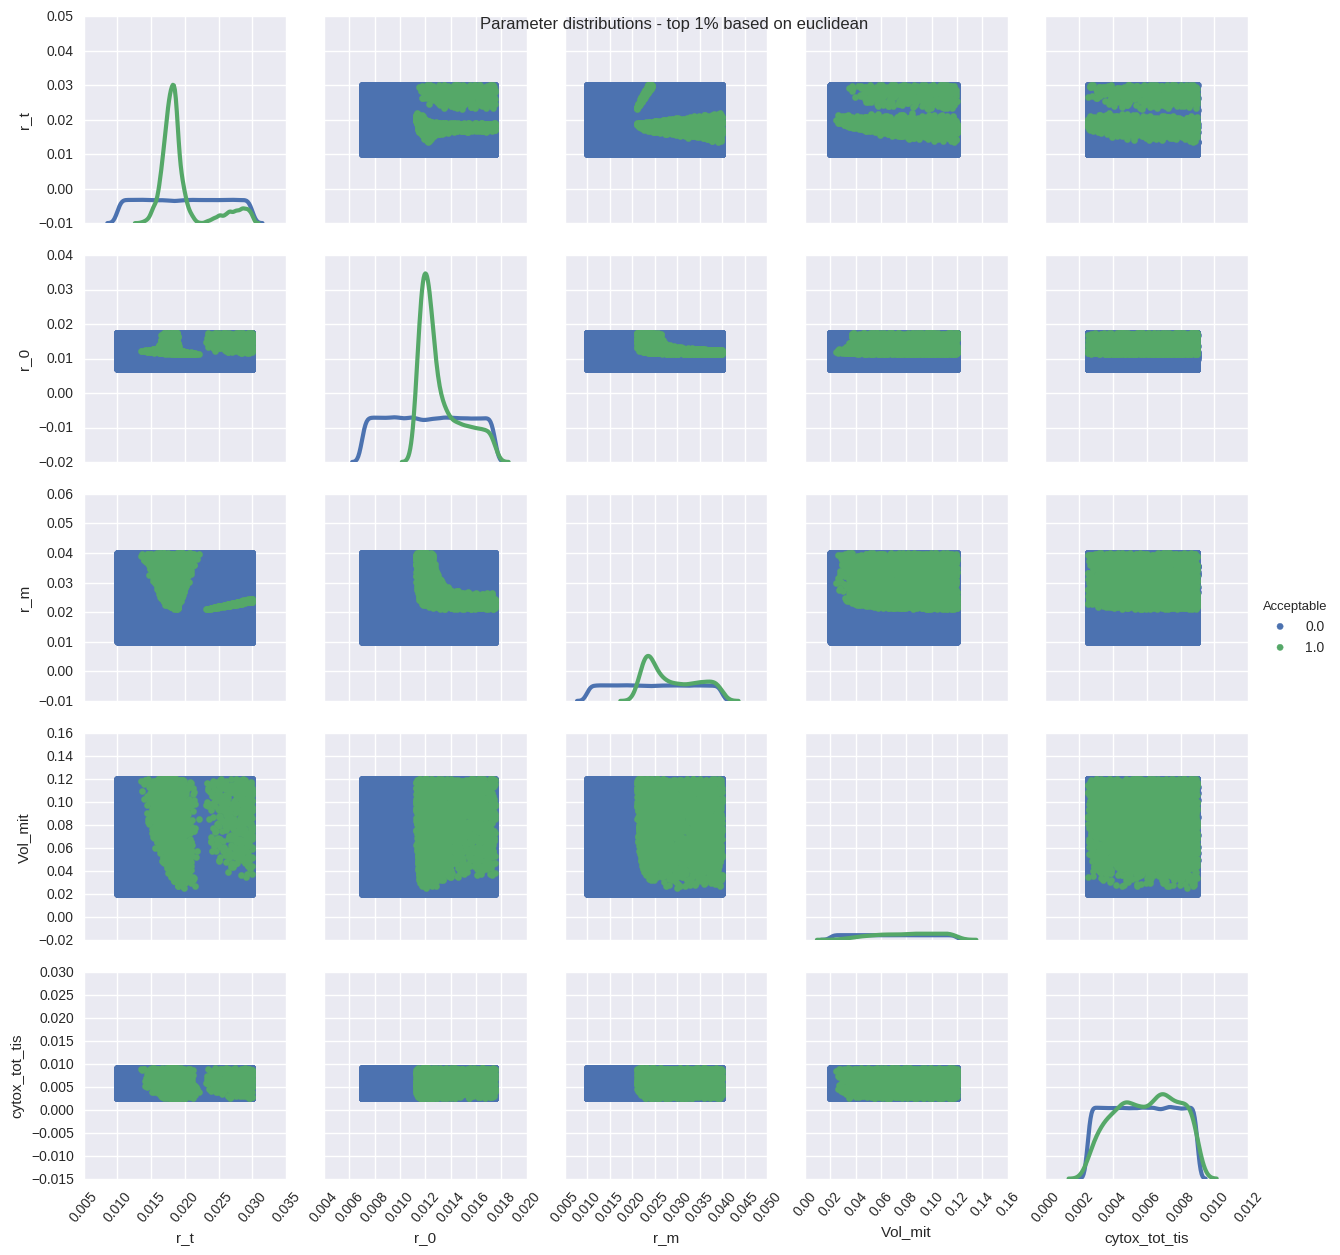

In [5]:
distances = ['euclidean','MSE', 'MAE']
for d in ['euclidean']:
    plt.figure()

    result['Acceptable'] = np.zeros(len(result))
    result.sort_values(by=d, inplace=True)
    #acceptable_idx = result[d] < 175
    #result['Acceptable'].ix[acceptable_idx] = 1
    result['Acceptable'].iloc[:int(num_lines/1000)] = 1
    g = sns.PairGrid(result, vars=['r_t', 'r_0', 'r_m', 'Vol_mit', 'cytox_tot_tis'], hue='Acceptable')
    g.map_diag(sns.kdeplot, lw=3, legend=False)
    g.map_offdiag(plt.scatter)
    g.add_legend()
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(50)
    plt.suptitle("Parameter distributions - top 0.1% based on {}".format(d))
    
    plt.figure()

    result['Acceptable'] = np.zeros(len(result))
    result.sort_values(by=d, inplace=True)
    #acceptable_idx = result[d] < 175
    #result['Acceptable'].ix[acceptable_idx] = 1
    result['Acceptable'].iloc[:int(num_lines/100)] = 1
    g = sns.PairGrid(result, vars=['r_t', 'r_0', 'r_m', 'Vol_mit', 'cytox_tot_tis'], hue='Acceptable')
    g.map_diag(sns.kdeplot, lw=3, legend=False)
    g.map_offdiag(plt.scatter)
    g.add_legend()
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(50)
    plt.suptitle("Parameter distributions - top 1% based on {}".format(d))
    

# Distributions #
The following plots show the top 0.1% and top 1% of parameters. They are plotted as KDE plots, and histograms of the general distributions is also included.

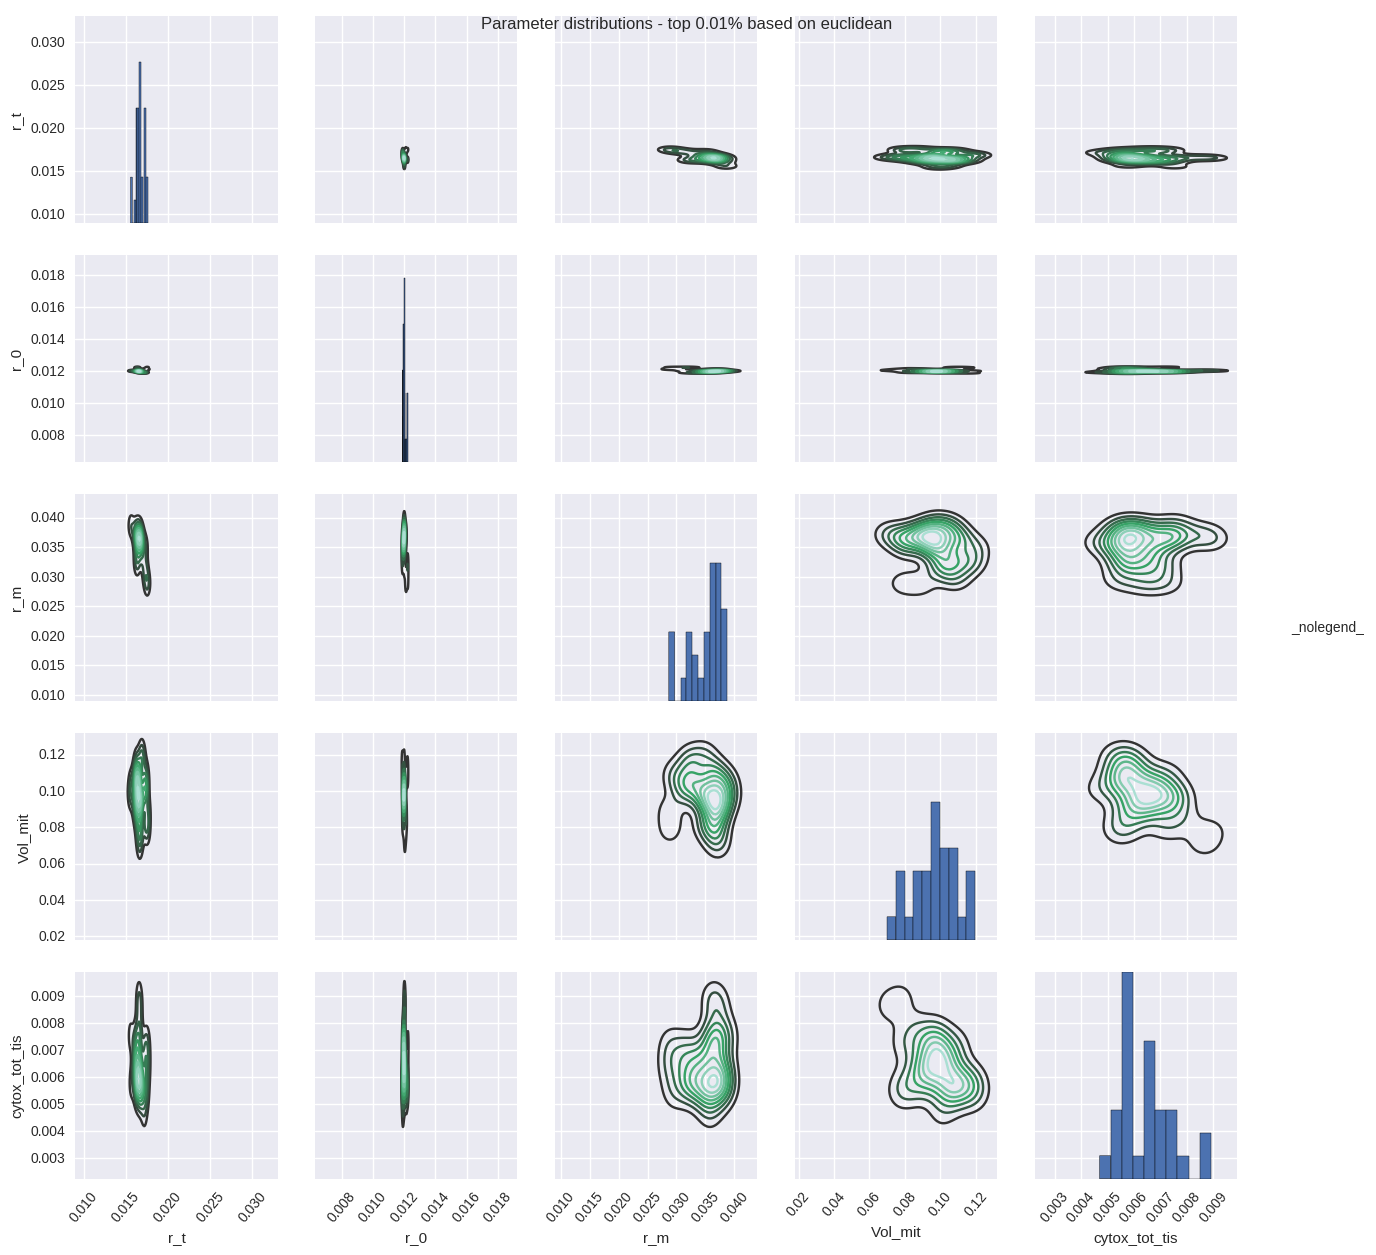

In [6]:
d = 'euclidean'
params = ['r_t', 'r_0', 'r_m', 'Vol_mit', 'cytox_tot_tis']
result.sort_values(by=d, inplace=True)
g = sns.PairGrid(result.iloc[:int(num_lines/10000)], vars=['r_t', 'r_0', 'r_m', 'Vol_mit', 'cytox_tot_tis'])
g.map_diag(plt.hist)
g.map_offdiag(sns.kdeplot, lw=3, legend=False)
g.add_legend()
for ii, ax in enumerate(g.axes.flat):
    for label in ax.get_xticklabels():
        label.set_rotation(50)
    #print("Ylim: {}, {}".format(min(result[params[ii//5]]),max(result[params[ii//5]])))
    #print("Xlim: {}, {}".format(min(result[params[ii%5]]), max(result[params[ii%5]])))
    ax.set_ylim(0.9*min(result[params[ii//5]]), 1.1*max(result[params[ii//5]]))
    ax.set_xlim(0.9*min(result[params[ii%5]]), 1.1*max(result[params[ii%5]]))
plt.suptitle("Parameter distributions - top 0.01% based on {}".format(d))

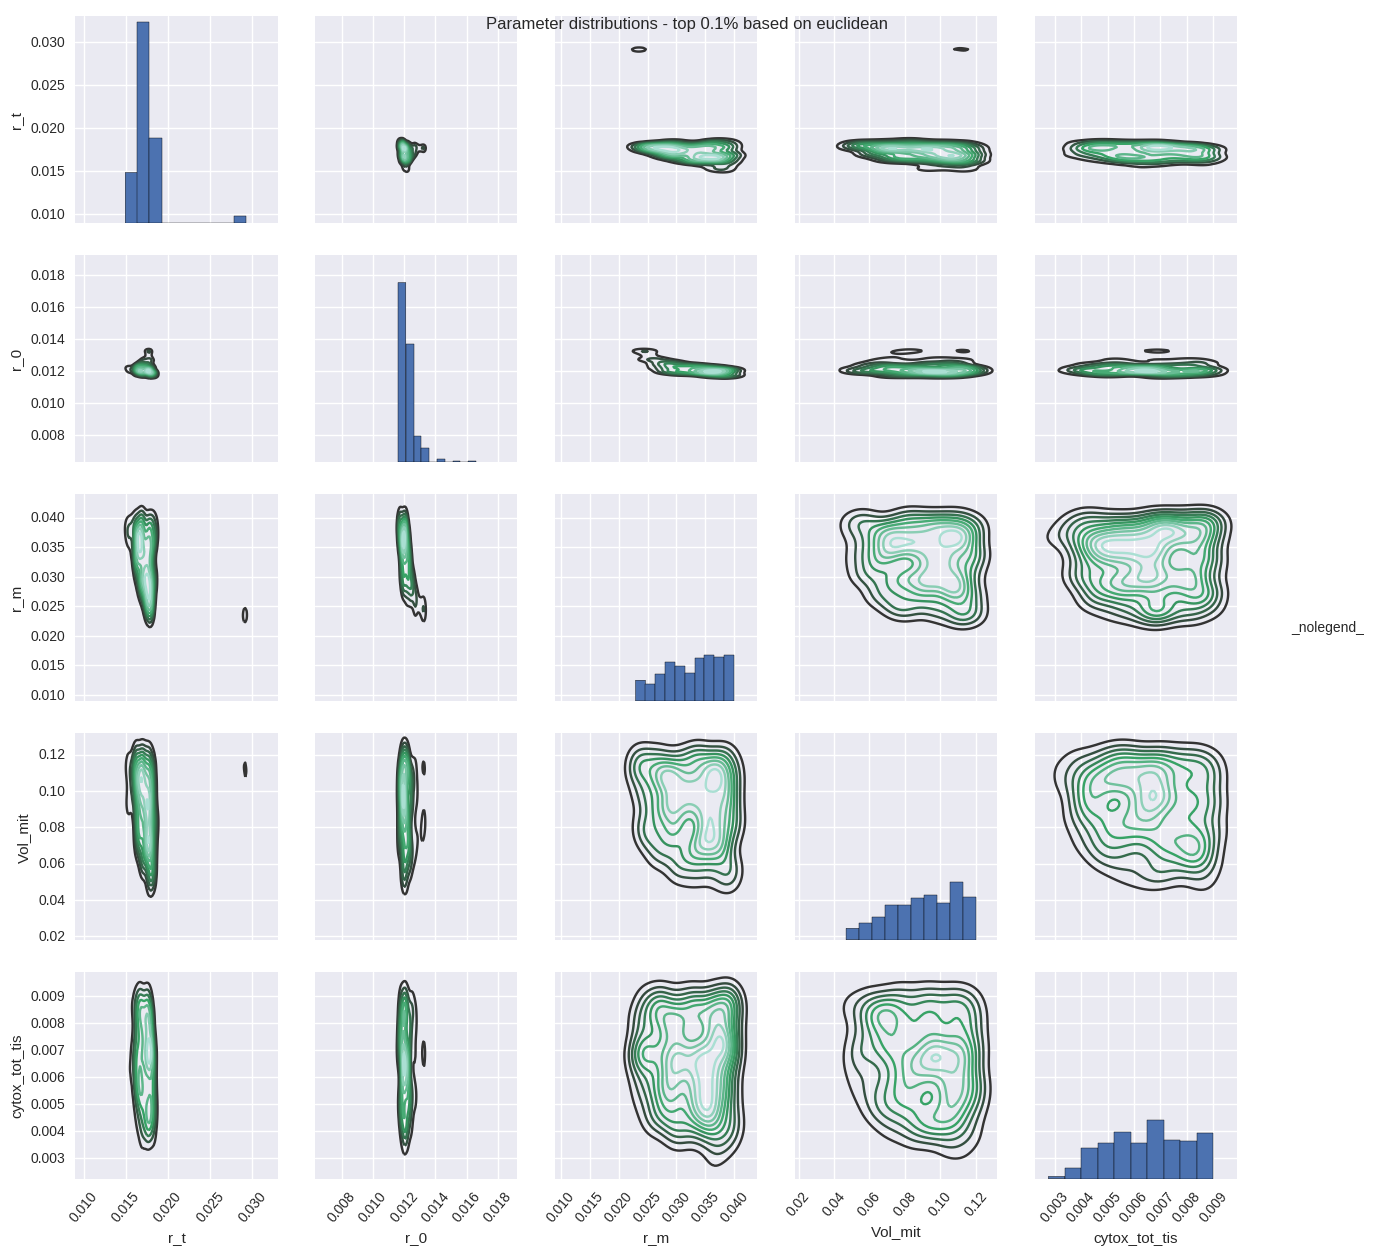

In [7]:
d = 'euclidean'
params = ['r_t', 'r_0', 'r_m', 'Vol_mit', 'cytox_tot_tis']
result.sort_values(by=d, inplace=True)
g = sns.PairGrid(result.iloc[:int(num_lines/1000)], vars=['r_t', 'r_0', 'r_m', 'Vol_mit', 'cytox_tot_tis'])
g.map_diag(plt.hist)
g.map_offdiag(sns.kdeplot, lw=3, legend=False)
g.add_legend()
for ii, ax in enumerate(g.axes.flat):
    for label in ax.get_xticklabels():
        label.set_rotation(50)
    #print("Ylim: {}, {}".format(min(result[params[ii//5]]),max(result[params[ii//5]])))
    #print("Xlim: {}, {}".format(min(result[params[ii%5]]), max(result[params[ii%5]])))
    ax.set_ylim(0.9*min(result[params[ii//5]]), 1.1*max(result[params[ii//5]]))
    ax.set_xlim(0.9*min(result[params[ii%5]]), 1.1*max(result[params[ii%5]]))
plt.suptitle("Parameter distributions - top 0.1% based on {}".format(d))

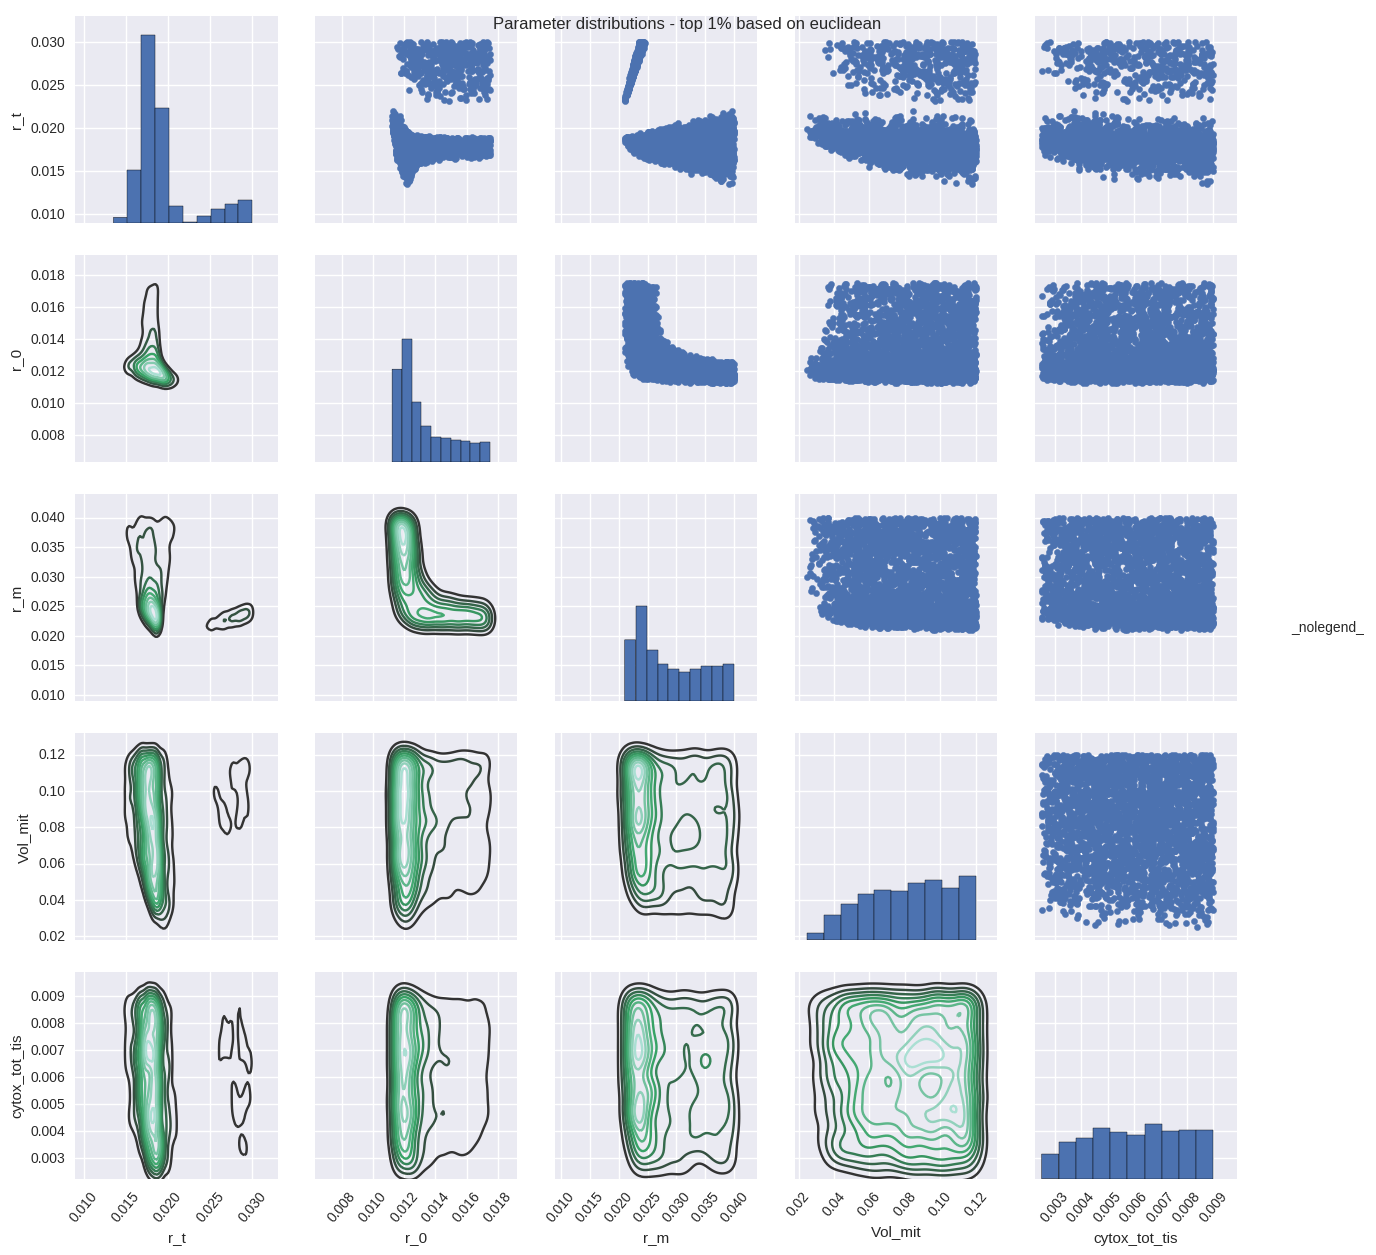

In [8]:
result.sort_values(by=d, inplace=True)
g = sns.PairGrid(result.iloc[:int(num_lines/100)], vars=params)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, lw=3, legend=False)
g.add_legend()
for ii, ax in enumerate(g.axes.flat):
    for label in ax.get_xticklabels():
        label.set_rotation(50)
    ax.set_ylim(0.9*min(result[params[ii//5]]), 1.1*max(result[params[ii//5]]))
    ax.set_xlim(0.9*min(result[params[ii%5]]), 1.1*max(result[params[ii%5]]))
plt.suptitle("Parameter distributions - top 1% based on {}".format(d))

## Resampling ##


In [7]:
from scipy import stats

In [8]:
posterior = {}
for frac in [0.01,0.001,0.0001]:
    d = 'euclidean'
    params = ['r_t', 'r_0', 'r_m', 'Vol_mit', 'cytox_tot_tis']
    result.sort_values(by=d, inplace=True)
    p = result.iloc[:int(num_lines*frac)][params].as_matrix()
    posterior[frac] = stats.gaussian_kde(p.T).resample(1)

In [9]:
posterior

{0.0001: array([[ 0.01667262],
        [ 0.01193248],
        [ 0.03589887],
        [ 0.09280063],
        [ 0.0062296 ]]), 0.001: array([[ 0.01554517],
        [ 0.01198036],
        [ 0.03273948],
        [ 0.10309888],
        [ 0.00823312]]), 0.01: array([[ 0.01794042],
        [ 0.01304716],
        [ 0.02680249],
        [ 0.11007463],
        [ 0.00544824]])}

# Run Model #

In [35]:
import sys
sys.path.append('../../..')

In [36]:
from bayescmd.util import findBaseDir

In [37]:
BASEDIR = os.path.abspath(findBaseDir('BayesCMD'))


STARTING AT: /home/buck06191/repos/GitHub/BayesCMD/bayescmd
 Looking for: BayesCMD


In [38]:
os.environ['BASEDIR']='BayesCMD'

In [39]:
from bayescmd.bcmdModel import ModelBCMD

In [40]:
input_path = os.path.join(BASEDIR,'data','hx01.csv')
openopt_path = os.path.join(BASEDIR,'data','hx01_611.csv')

In [41]:
true_data = pd.read_csv(input_path)
openopt_data = pd.read_csv(openopt_path)

In [42]:
outputs = ['Vmca','CCO']
model_name = 'BS'
inputs = ['Pa_CO2', 'P_a', 'SaO2sup']
times = true_data['t'].as_matrix()

In [43]:
from bayescmd.abc import inputParse, import_actual_data
d0 = import_actual_data(input_path)
input_data = inputParse(d0, inputs)

In [44]:
def run_model(model):
    model.create_initialised_input()
    model.run_from_buffer()
    output = model.output_parse()
    return output


In [47]:
def plot_output(posterior_sample, plot=True):
    # run model and collect output
    param_names = ['r_t', 'r_0', 'r_m', 'Vol_mit', 'cytox_tot_tis']
    params = dict(zip(param_names, [l for i in posterior_sample[1] for l in i]))
    #print(posterior_sample[0])
    #print(params)
    model = ModelBCMD(model_name,
                     inputs=input_data,
                     params=params,
                     times=times,
                     outputs=outputs)
    output = run_model(model)
    try:
        out_df = pd.DataFrame(data=output)
    except ValueError:
        print("error running for {}".format(posterior_sample[0]))
    if plot:
        fig, ax = plt.subplots(2)
        ax[0].plot(times, out_df['CCO'], 'b', label='Bayesian')
        ax[0].plot(times, true_data['CCO'], 'g', label='True')
        ax[0].plot(times, openopt_data['CCO'], 'r', label='openopt')
        ax[0].set_title('CCO')
        ax[0].legend()

        ax[1].plot(times, out_df['Vmca'], 'b', label='Bayesian')
        ax[1].plot(times, true_data['Vmca'], 'g', label='True')
        ax[1].plot(times, openopt_data['Vmca'], 'r', label='openopt')
        ax[1].set_title('Vmca')
        ax[1].legend()
        fig.suptitle("Parameter distributions - top {} of data".format(posterior_sample[0]))
    return params, output

In [149]:
#for ps in posterior.items():
    #if ps[0]==0.01:
    #    continue
    #print(ps)
#    output = plot_output(ps)
outputs_list= []
frac = 0.00005
for i in range(50):
    p = result.iloc[:int(num_lines*frac)][params].as_matrix()
    ps = stats.gaussian_kde(p.T).resample(1)
    outputs_list.append(plot_output((frac, ps), plot=False))


In [150]:
CCO_data = [o[1]['CCO'] for o in outputs_list]

In [151]:
Vmca_data = [o[1]['Vmca'] for o in outputs_list]

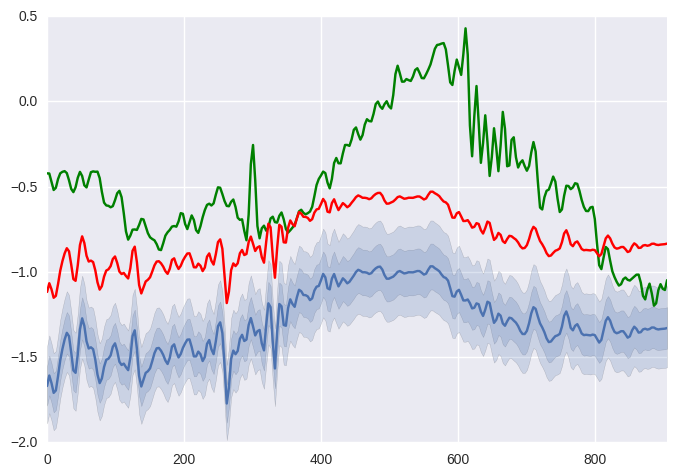

In [152]:
ax1 = sns.tsplot(data=CCO_data, time=times, err_style=["ci_band"], ci=[68,95])
ax1.plot(times, true_data['CCO'], 'g', label='True')
ax1.plot(times, openopt_data['CCO'], 'r', label='openopt')

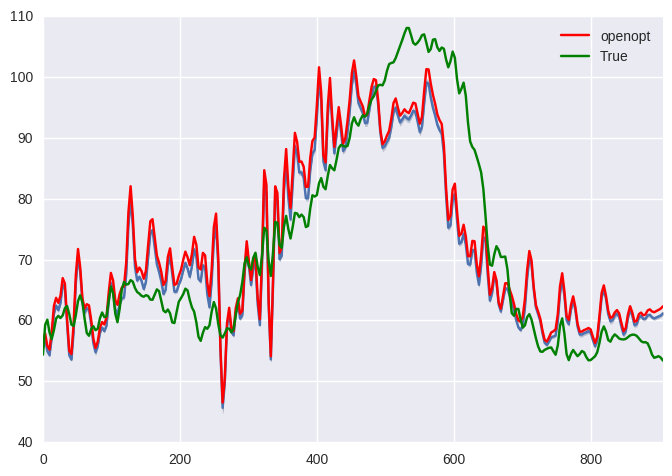

In [202]:
ax2 = sns.tsplot(data=Vmca_data, time=times, err_style="ci_band", ci=[68,95], estimator=np.nanmean)
ax2.plot(times, openopt_data['Vmca'], 'r', label='openopt')
ax2.plot(times, true_data['Vmca'], 'g', label='True')
ax2.legend()

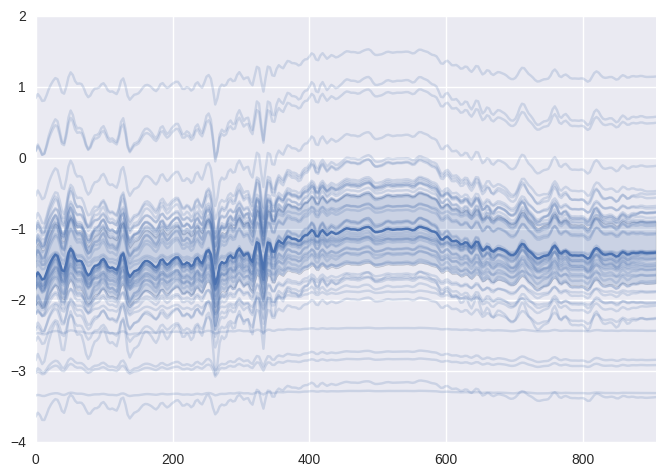

In [203]:
ax2 = sns.tsplot(data=CCO_data, time=times, err_style=["unit_traces", "ci_band"], ci=[100], estimator=np.nanmean)

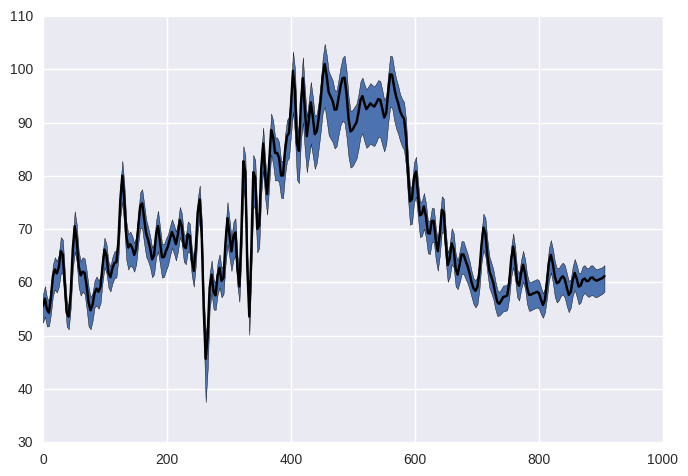

In [155]:
Vmca_min = np.array(Vmca_data).min(axis=0)
Vmca_max = np.array(Vmca_data).max(axis=0)
Vmca_mean = np.array(Vmca_data).mean(axis=0)

ax = plt.subplot(1,1,1)
ax.plot(times,Vmca_mean, 'k')
ax.fill_between(times, Vmca_min, Vmca_max)

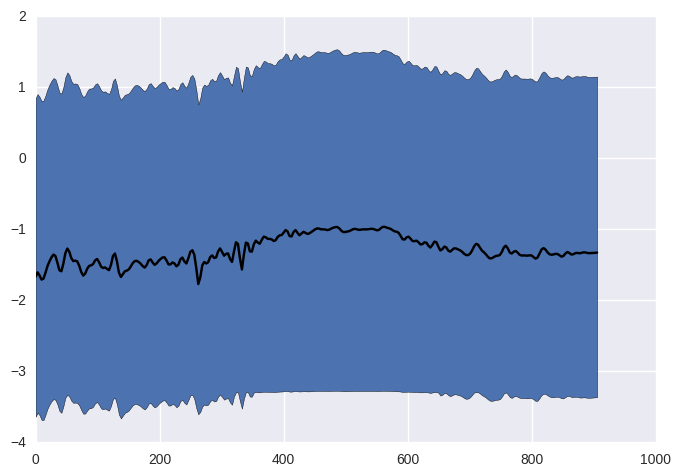

In [156]:
CCO_min = np.array(CCO_data).min(axis=0)
CCO_max = np.array(CCO_data).max(axis=0)
CCO_mean = np.array(CCO_data).mean(axis=0)

ax = plt.subplot(1,1,1)
ax.plot(times, CCO_mean, 'k')
ax.fill_between(times, CCO_min, CCO_max)

# Plot the KDE #

In [191]:
rt_range = np.linspace(0.01,0.03,100)
rm_range = np.linspace(0.01, 0.04, 100)
r0_range = np.linspace(0.007, 0.0175, 100)
volmit_range = np.linspace(0.02, 0.12, 100)
cytox_range =  np.linspace(0.0025, 0.009, 100)

ranges = [rt_range, rm_range, r0_range, volmit_range, cytox_range]

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


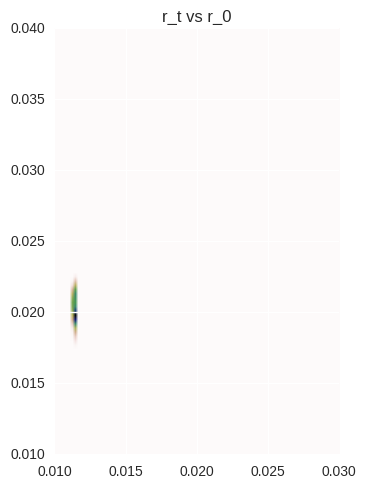

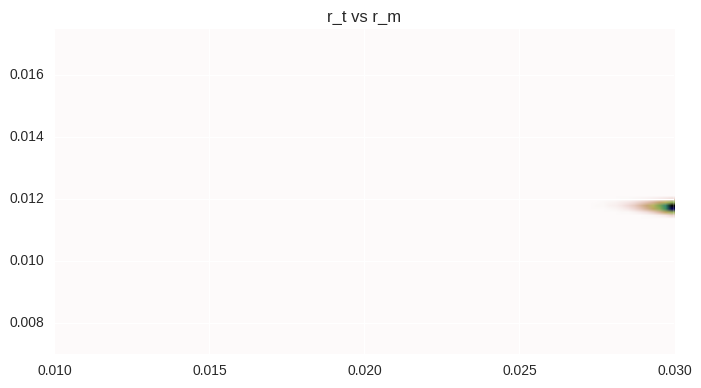

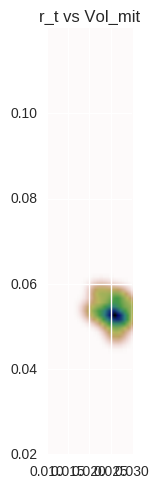

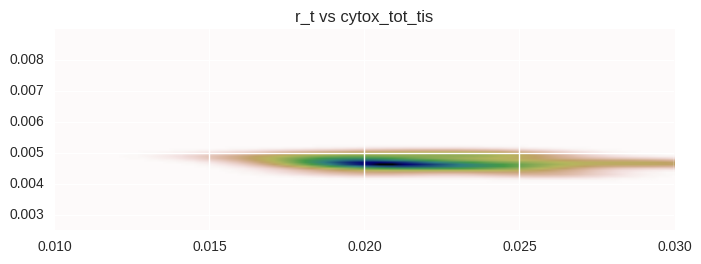

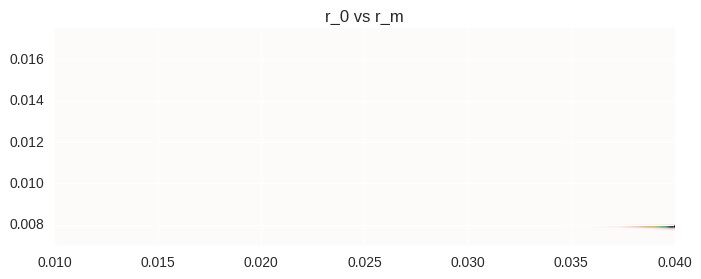

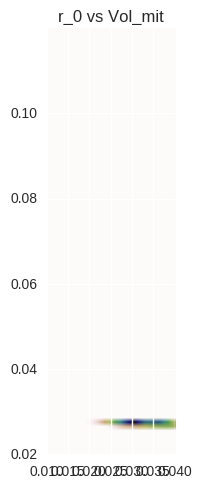

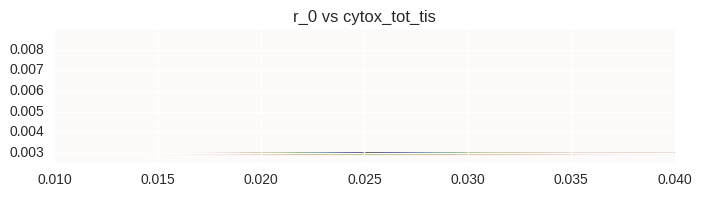

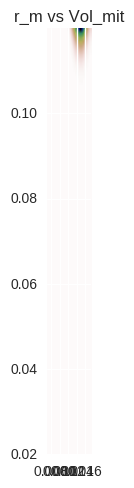

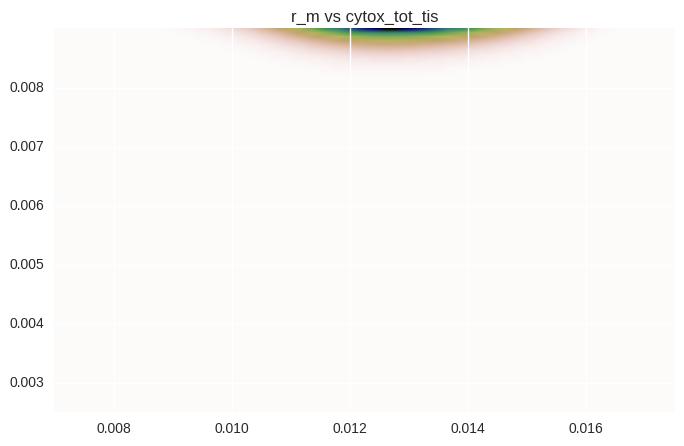

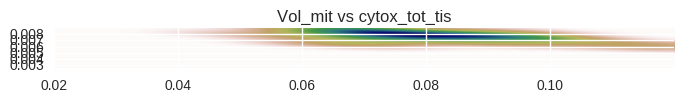

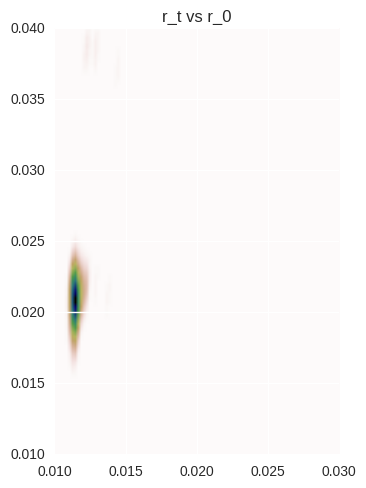

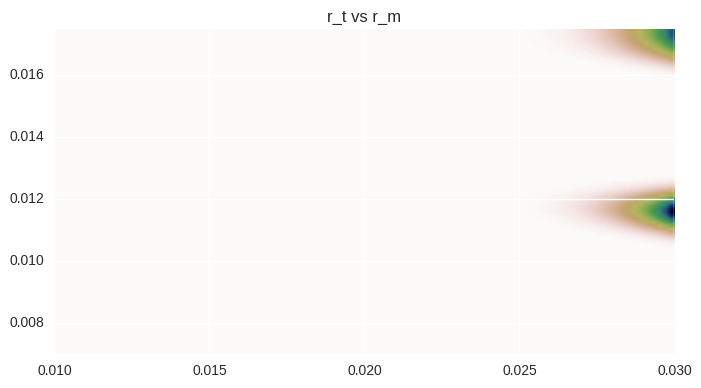

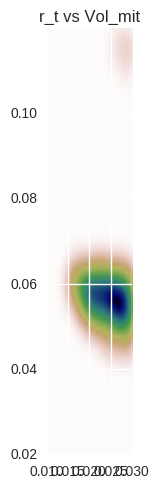

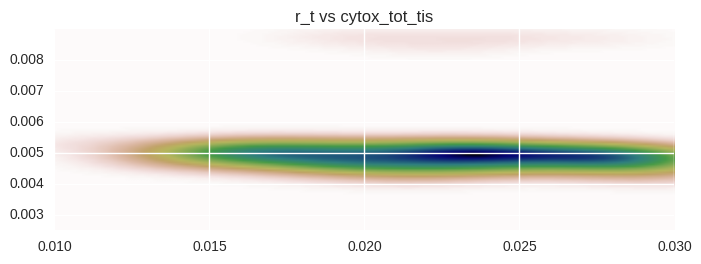

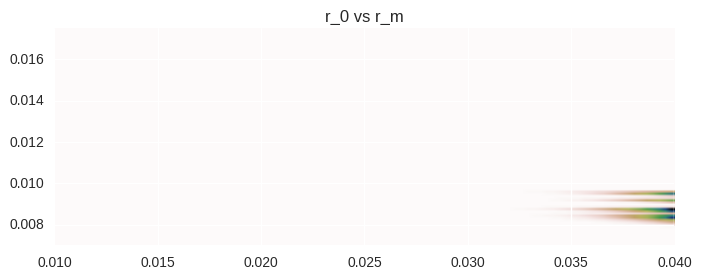

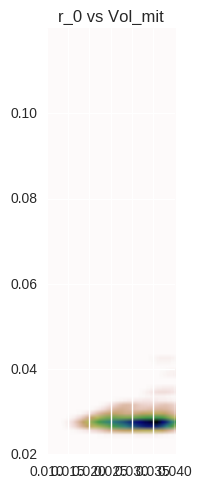

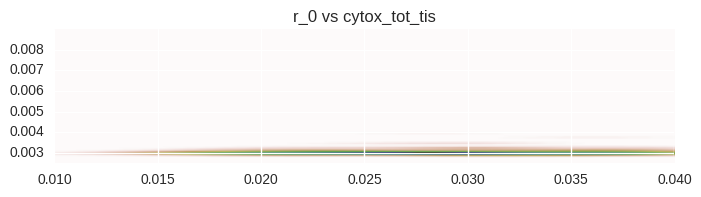

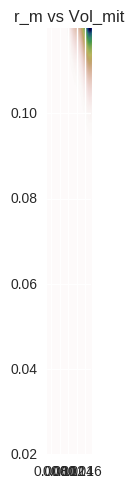

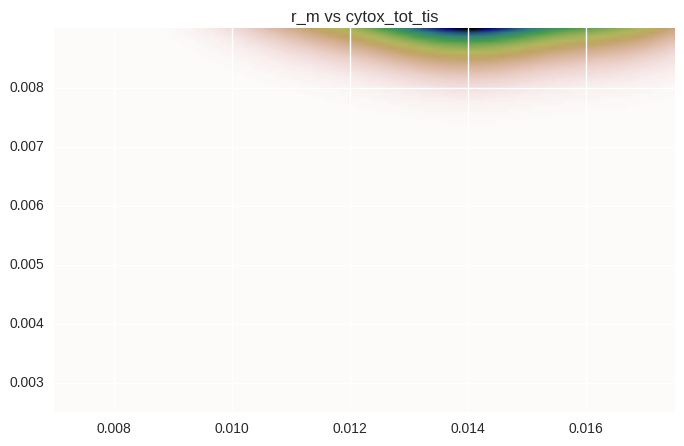

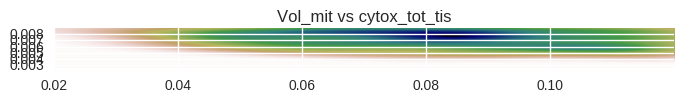

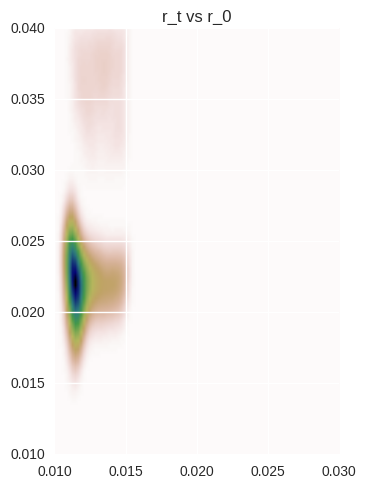

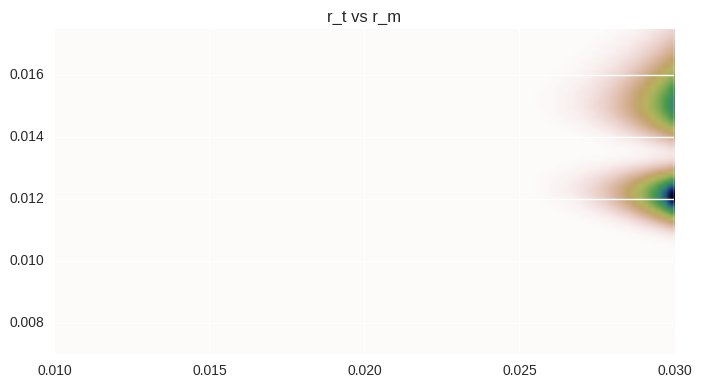

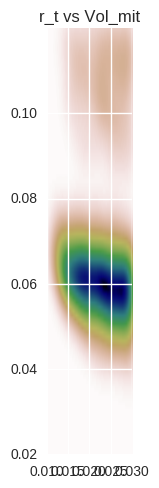

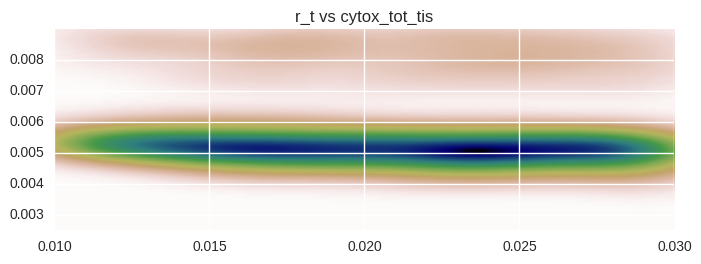

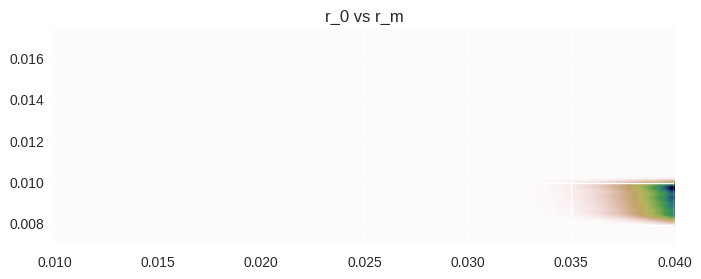

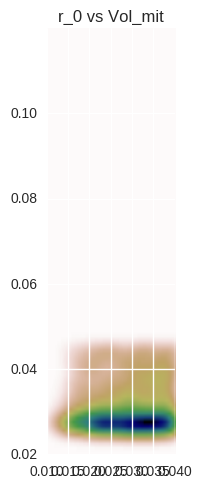

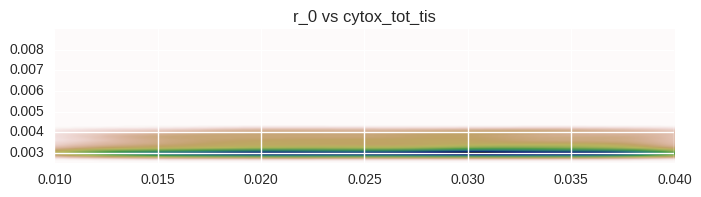

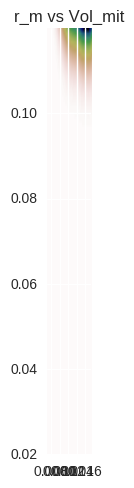

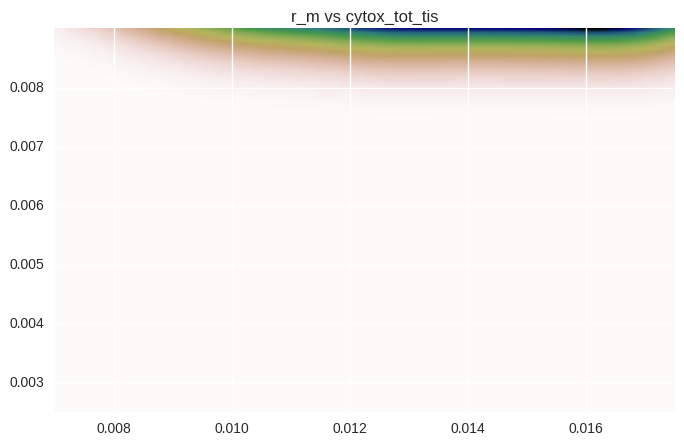

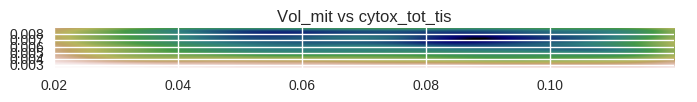

In [201]:
import itertools
posterior = {}
#fig, ax = plt.subplots(5,5)
for frac in [0.0001,0.001,0.01]:
    d = 'euclidean'
    params = ['r_t', 'r_0', 'r_m', 'Vol_mit', 'cytox_tot_tis']
    result.sort_values(by=d, inplace=True)
    p = result.iloc[:int(num_lines*frac)][params].as_matrix()
    
    for r in itertools.combinations(range(5), 2):
        kernel = stats.gaussian_kde(p[:,r].T)
        x,y = ranges[r[0]], ranges[r[1]]
        X, Y = np.meshgrid(x, y)
        positions = np.vstack([X.ravel(), Y.ravel()])
        Z = np.reshape(kernel(positions).T, X.shape)
        plt.figure()
        plt.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
                              extent=[x.min(), x.max(), y.min(), y.max()])
        plt.title("{} vs {}".format(params[r[0]], params[r[1]]))

Axes(0.547727,0.398529;0.352273x0.227941)


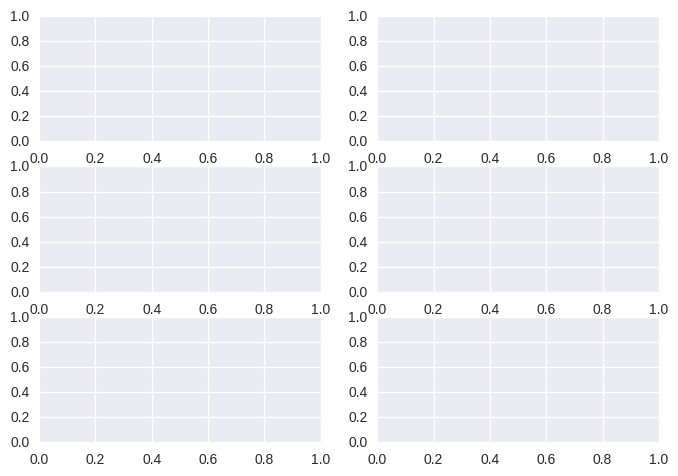

In [179]:
fig, axe = plt.subplots(3,2)
print(axe[1][1])

10